<a href="https://colab.research.google.com/github/IamGustavodePaula/Gest-o-Governan-a-Kangu-/blob/master/A3_UC_IA_USJT_PROJ_FUTEBOL_(REVISADO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importação de Bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import preprocessing
%matplotlib inline

In [ ]:
#Coleta de Dados do dataset contendo os resultados do campeonato brasileiro
dados_csv_bra = 'https://www.football-data.co.uk/new/BRA.csv'
data = pd.read_csv(dados_csv_bra, sep=',')
display(data.head())

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
#Conversão dos Dados da Coluna Res de String para valores Inteiros
data.loc[data['Res'] == 'D', 'Res'] = 0
data.loc[data['Res'] == 'H', 'Res'] = 1
data.loc[data['Res'] == 'A', 'Res'] = 2
data

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,Brazil,Serie A,2022,13/11/2022,19:00,Corinthians,Atletico-MG,0.0,1.0,2,3.14,3.19,2.52,3.35,3.34,2.57,3.06,3.07,2.45
4176,Brazil,Serie A,2022,13/11/2022,19:00,Cuiaba,Coritiba,2.0,1.0,1,1.94,3.54,4.30,2.05,3.60,4.35,1.94,3.37,4.00
4177,Brazil,Serie A,2022,13/11/2022,19:00,Goias,Sao Paulo,0.0,4.0,2,5.09,3.99,1.71,5.25,3.99,1.75,4.85,3.78,1.69
4178,Brazil,Serie A,2022,13/11/2022,19:00,Internacional,Palmeiras,3.0,0.0,1,2.60,3.59,2.74,2.64,3.66,2.85,2.49,3.45,2.72


In [ ]:
#Análise Exploratória Inicial
matches = data.shape[0]
features = data.shape[1]
vitorias_em_casa = len(data[data.Res==1.0])
vitorias_vistante = len(data[data.Res==2.0])
empate = len(data[data.Res==0])
val=[vitorias_em_casa,vitorias_vistante,empate]
percentual_vitorias_em_casa = (float(vitorias_em_casa)/(matches))*100

In [ ]:
#Explorando os dados
#Base de dados de dos campeonatos de 2012 a 2022

print('Total de Jogos: ', matches)
print('Total de Colunas: ', features)
print('Total de Vitórias em Casa: ', vitorias_em_casa)
print('Total de Vitórias Visitantes: ', vitorias_vistante)
print('Total de Empates: ', empate)
print('Percentual de Vitórias em Casa: {:.2f}%'.format(percentual_vitorias_em_casa))

Total de Jogos:  4180
Total de Colunas:  19
Total de Vitórias em Casa:  2032
Total de Vitórias Visitantes:  1017
Total de Empates:  1130
Percentual de Vitórias em Casa: 48.61%


In [ ]:
#Convertento nome de times em IDs
le = preprocessing.LabelEncoder()
le.fit(data['Home'])
data['Home'] = le.transform(data['Home'])
data['Away'] = le.transform(data['Away'])
data['id_partida'] = data['Home'].astype(str) + "-" + data['Away'].astype(str)
data['Total_Gols'] = data['HG'] + data['AG']
data
data.to_csv('BRA_anl.csv', sep=',')

In [ ]:
#Preparação de Dados
data.isnull().sum()
data = data.dropna()
num_data = data.drop(['Country','League', 'Season','Date','Time','id_partida'],1)
num_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,Total_Gols
0,27,30,1.0,1.0,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,2.0
1,34,18,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,2.0
2,17,26,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,3.0
3,7,33,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,6.0
4,12,19,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,12,3,0.0,1.0,2,3.14,3.19,2.52,3.35,3.34,2.57,3.06,3.07,2.45,1.0
4176,16,13,2.0,1.0,1,1.94,3.54,4.30,2.05,3.60,4.35,1.94,3.37,4.00,3.0
4177,21,33,0.0,4.0,2,5.09,3.99,1.71,5.25,3.99,1.75,4.85,3.78,1.69,4.0
4178,23,27,3.0,0.0,1,2.60,3.59,2.74,2.64,3.66,2.85,2.49,3.45,2.72,3.0


In [ ]:
#Definição de Features e Labels

features = num_data.drop(['Res'],1)
#features = num_data.drop(['Res','MaxH','MaxD','MaxA'],1)
#features = num_data.drop(['AvgH','AvgD','AvgA'],1)
#features = num_data.drop(['PD','PA','PH'],1)
labels = num_data['Res']

print(features.head())
print('==============================')
print(labels.head())

   Home  Away   HG   AG    PH    PD    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA  \
0    27    30  1.0  1.0  1.75  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90   
1    34    18  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58   
2    17    26  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64   
3     7    33  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84   
4    12    19  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89   

   Total_Gols  
0         2.0  
1         2.0  
2         3.0  
3         6.0  
4         1.0  
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Escoolhendo as melhores features com Kbest
features_list = ('HG', 'AG', 'PH', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'PD')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_paris = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_paris[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
k_best_features_final


Melhores features:


{'PA': 1394.2524228355198,
 'MaxH': 1325.387250674617,
 'MaxD': 179.17758569241298,
 'AvgD': 157.98469341736347,
 'AvgH': 155.3462556348799,
 'PD': 152.9045630391357,
 'AvgA': 76.91312998805661,
 'MaxA': 74.76246543907656,
 'AG': 0.6646920394263404,
 'PH': 0.41705798132435606}

In [ ]:
#Seprando as features com base nas melhores features para treinamento
features = num_data.drop(['Res','Home','Away','AG','PH'],1)
labels = num_data['Res']
print(features.head())
print('==============================')
print(labels.head())

    HG    PD    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA  Total_Gols
0  1.0  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90         2.0
1  1.0  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58         2.0
2  2.0  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64         3.0
3  4.0  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84         6.0
4  0.0  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89         1.0
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print(features_scale)

Features:  (4179, 10)
[[0.16666667 0.13594233 0.14421386 ... 0.11913357 0.14746363 0.22222222]
 [0.16666667 0.08753862 0.05381639 ... 0.0866426  0.0562328  0.22222222]
 [0.33333333 0.15447992 0.1959198  ... 0.13959085 0.17656311 0.33333333]
 ...
 [0.         0.14933059 0.0196975  ... 0.15282792 0.02123476 0.44444444]
 [0.5        0.10813594 0.05592684 ... 0.11311673 0.0617381  0.33333333]
 [0.         0.09577755 0.04009849 ... 0.09506619 0.04286276 0.22222222]]


In [ ]:
#Separando treinamento e teste
#Separação manual para manter a ordem cronológica, uma vez que temos informação temporal. 

X_train = features_scale[:3352]
X_test = features_scale[3352:3977]
y_train = labels[:3352]
y_test = labels[3352:3977]

print( len(X_train), len(y_train))
print( len(X_test), len(y_test))

3352 3352
625 625


In [ ]:
#Treinando Modelos Regressão Logística
clf_LR = LogisticRegression(multi_class='multinomial', max_iter=2000)
clf_LR.fit(X_train, y_train.astype(float))
pred = clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test.astype(float), pred)
f1=f1_score(y_test.astype(float), pred,average = 'micro')

print('Acurácia Regressão Logistica:{}'.format(lg_acc))
print('F1 Score:{}'.format(f1))

Acurácia Regressão Logistica:0.9664
F1 Score:0.9664


In [ ]:
#Teste de Regressão Logística com hyper parameters

param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000 ]}
search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train.astype(float))
clf = search.best_estimator_
pred = clf.predict(X_test)
lg_acc = accuracy_score(y_test.astype(float), pred)

f1=f1_score(y_test.astype(float), pred, average ='micro')

print('Acurácia Regressão Logistica:{}'.format(lg_acc))
print('F1 Score:{}'.format(f1))
print(clf)

Acurácia Regressão Logistica:1.0
F1 Score:1.0
LogisticRegression(C=100, max_iter=1000)


In [ ]:
#Treinamento e Teste de Modelos SVC

clf = SVC()
clf.fit(X_train,y_train.astype(float))
pred - clf.predict(X_test)

svc_acc = accuracy_score(y_test.astype(float), pred)
f1=f1_score(y_test.astype(float), pred, average ='micro')
print('Acurácia Regressão Logistica:{}'.format(lg_acc))
print('F1 Score:{}'.format(f1))

Acurácia Regressão Logistica:1.0
F1 Score:1.0


In [ ]:
#Teste de SVC com hyper parameters

param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000 ]}
search = GridSearchCV(SVC(), param_grid)

search.fit(X_train,y_train.astype(float))
clf_SVC = search.best_estimator_
pred = clf_SVC.predict(X_test)
acc = accuracy_score(y_test.astype(float), pred)

f1=f1_score(y_test.astype(float), pred, average ='micro')

print('Acurácia Regressão Logistica:{}'.format(acc))
print('F1 Score:{}'.format(f1))
print(clf_SVC)

Acurácia Regressão Logistica:0.9984
F1 Score:0.9984
SVC(C=10)


In [ ]:
#Treinando e testando os modelos
print ('Decision Tree')


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.astype(float))
pred= clf.predict(X_test)

dt_acc = accuracy_score(y_test.astype(float), pred)
f1=f1_score(y_test.astype(float),pred, average='macro')
print ('Acurácia Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )


n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Decision Tree
Acurácia Tree:1.0
F1 Score:1.0


In [ ]:
#Testando Decision tree hyper parameters
print ('Decision Tree')

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    
  
}

search = GridSearchCV(DecisionTreeClassifier(), param_grid)

search.fit(X_train,y_train.astype(float))
clf = search.best_estimator_
pred= clf.predict(X_test)
dt_acc = accuracy_score(y_test.astype(float), pred)


f1=f1_score(y_test.astype(float),pred,average = 'micro')

print ('Acurácia Decision Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)

Decision Tree
Acurácia Decision Tree:0.88
F1 Score:0.88
DecisionTreeClassifier(max_depth=100, max_features=3, min_samples_leaf=4,
                       min_samples_split=12)


In [ ]:
#Treinando e testando os modelos
print ('Naive baeys')


clf = GaussianNB()
clf.fit(X_train, y_train.astype(float))
pred= clf.predict(X_test)

nb_acc = accuracy_score(y_test.astype(float), pred)
f1=f1_score(y_test.astype(float),pred, average='micro')
print ('Acurácia Naive baeys:{}'.format(nb_acc))
print ('F1 Score:{}'.format(f1) )

Naive baeys
Acurácia Naive baeys:0.5072
F1 Score:0.5072


In [ ]:
#Executando Predições
#Escolhemos o Modelo SVC por apresentar a maior acurácia


previsao=features_scale[3977:]
game_id_full=data['id_partida']
game_id=game_id_full[3977:]

res_full=data['Res']
res=res_full[3977:]

pred=clf_SVC.predict(previsao)

df=pd.DataFrame({'Real':res, 'Previsao':pred, 'ID_Partida':game_id})
print(df)

     Real  Previsao ID_Partida
3978    0       0.0       16-3
3979    2       2.0       0-27
3980    0       0.0      33-21
3981    1       1.0        7-1
3982    2       2.0       5-18
...   ...       ...        ...
4175    2       2.0       12-3
4176    1       1.0      16-13
4177    2       2.0      21-33
4178    1       1.0      23-27
4179    2       2.0      32-20

[202 rows x 3 columns]


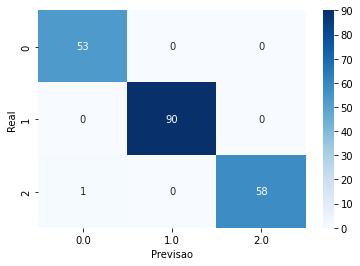

In [ ]:
#Matrix de Confusão

df=pd.DataFrame(df, columns=['Real','Previsao'])
cf_matrix=pd.crosstab(df['Real'], df['Previsao'], rownames=['Real'], colnames=['Previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')